# Digital Transformation in Banking Sector

## 1. Problem Definition
In a statement,
> Build a ML Model to perform focused digital marketing by predicting the potential customers who will convert from Liability customers to asset customers.


## 2. Evaluation
> If we can reach 90% across precision, Recall, and AUC Score at predicting the potential customers who will convert from Liability customers to asset customers.

## 3. Features
Here, we get to see different information about each of the features in the data.

**Create data dictionary**

1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("data/Data1.csv")
data2 = pd.read_csv("data/Data2.csv")

In [3]:
print(data1.shape)
print(data2.shape)

(5000, 8)
(5000, 7)


In [4]:
df = data1.merge(data2, how='inner', on='ID')
df.shape

(5000, 14)

In [5]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [6]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [8]:
df = df.drop(columns='ID')
df.shape

(5000, 13)

In [9]:
df.isnull().sum()

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [10]:
df = df.dropna()
df.shape

(4980, 13)

In [11]:
df.isnull().sum()

Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

## EDA

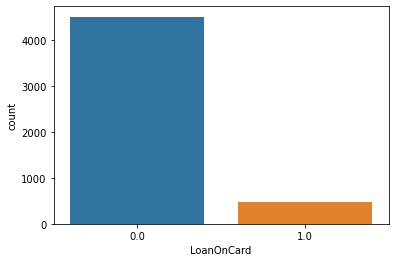

In [12]:
# Let explore how data is distributed as per target class
sns.countplot(x='LoanOnCard', data=df);

This shows the data is highly imbalanced. 

In [13]:
# Calculate target class data percentage
n_true = len(df.loc[df['LoanOnCard'] == 1.0])
n_false = len(df.loc[df['LoanOnCard'] == 0.0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.64%)
Number of false cases: 4500 (90.36%)


[None]

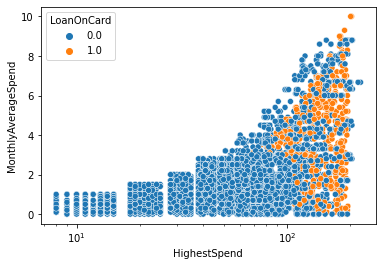

In [14]:
g = sns.scatterplot(x="HighestSpend", 
                    y="MonthlyAverageSpend", 
                    hue="LoanOnCard",
                    data=df, 
                    legend='full')
g.set(xscale='log')

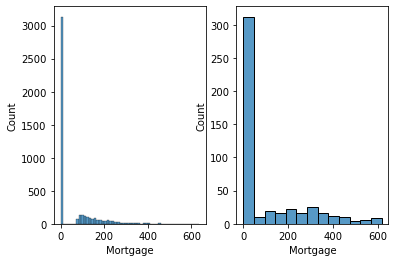

In [15]:
fig, ax = plt.subplots(1, 2)
sns.histplot(df.loc[df.LoanOnCard == 0.0, 'Mortgage'], ax = ax[0])
sns.histplot(df.loc[df.LoanOnCard == 1.0, 'Mortgage'], ax = ax[1])
plt.show()

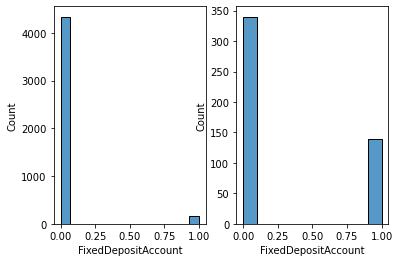

In [16]:
fig, ax = plt.subplots(1, 2)
sns.histplot(df.loc[df.LoanOnCard == 0.0, 'FixedDepositAccount'], ax = ax[0])
sns.histplot(df.loc[df.LoanOnCard == 1.0, 'FixedDepositAccount'], ax = ax[1])
plt.show()

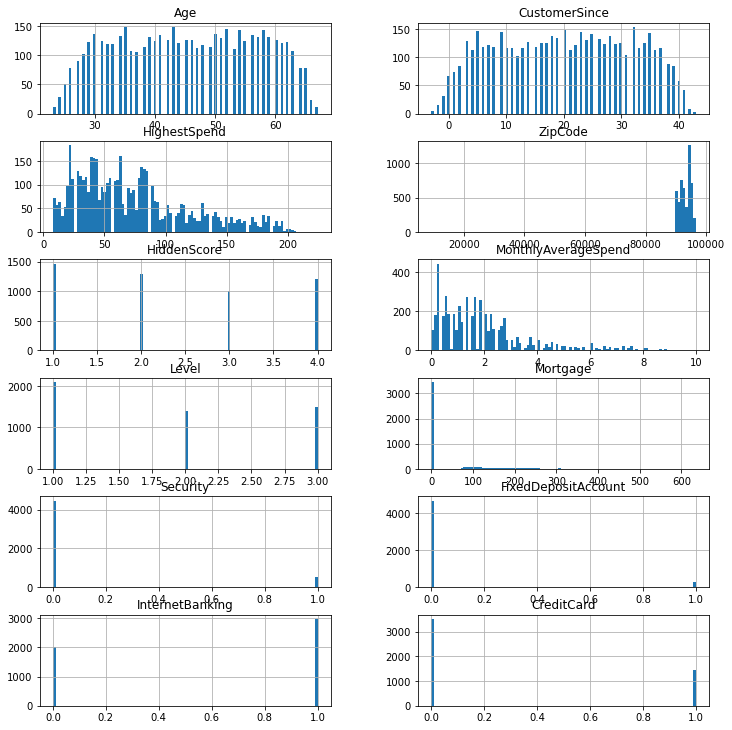

In [17]:
columns = list(df)[0:-1] # Excluding Outcome column which has only 

# Histogram of first 8 columns
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

In [18]:
corr = df.corr()
corr

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
Age,1.000000,0.994208,-0.054951,-0.029939,-0.045289,-0.051896,0.042750,-0.013272,0.000323,0.007744,0.011227,0.007344,-0.008147
CustomerSince,0.994208,1.000000,-0.046092,-0.029415,-0.051456,-0.049918,0.014545,-0.011380,-0.000469,0.010085,0.011355,0.008779,-0.007801
HighestSpend,-0.054951,-0.046092,1.000000,-0.016447,-0.158357,0.646109,-0.188909,0.207236,-0.002284,0.169535,0.014202,-0.002780,0.502626
ZipCode,-0.029939,-0.029415,-0.016447,1.000000,0.012250,-0.004339,-0.017274,0.007214,0.006312,0.020007,0.017186,0.007302,0.000120
HiddenScore,-0.045289,-0.051456,-0.158357,0.012250,1.000000,-0.109180,0.065762,-0.021396,0.019061,0.014327,0.010900,0.010784,0.061761
MonthlyAverageSpend,-0.051896,-0.049918,0.646109,-0.004339,-0.109180,1.000000,-0.137020,0.110275,0.015105,0.136410,-0.003475,-0.006577,0.366912
Level,0.042750,0.014545,-0.188909,-0.017274,0.065762,-0.137020,1.000000,-0.032863,-0.009443,0.013982,-0.014556,-0.011766,0.137010
Mortgage,-0.013272,-0.011380,0.207236,0.007214,-0.021396,0.110275,-0.032863,1.000000,-0.005002,0.089167,-0.007044,-0.007600,0.141947
Security,0.000323,-0.000469,-0.002284,0.006312,0.019061,0.015105,-0.009443,-0.005002,1.000000,0.317673,0.014007,-0.014518,0.021982
FixedDepositAccount,0.007744,0.010085,0.169535,0.020007,0.014327,0.136410,0.013982,0.089167,0.317673,1.000000,0.176082,0.278924,0.316131


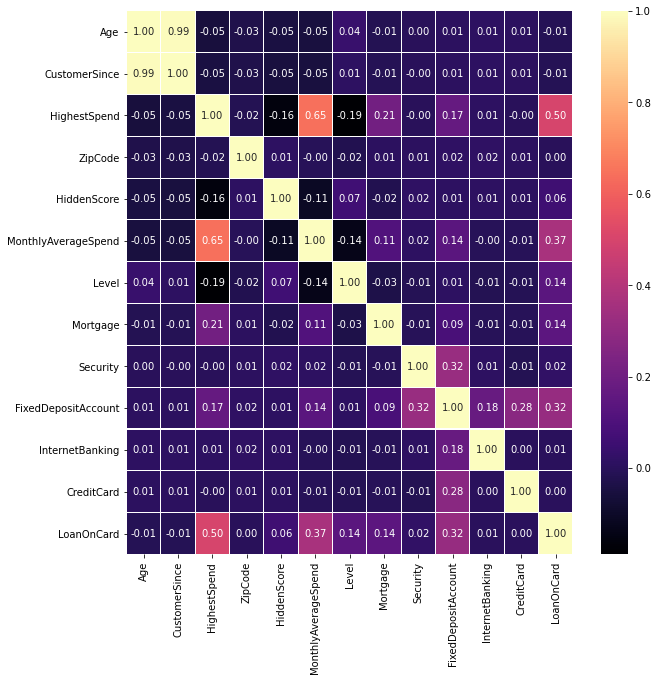

In [19]:
#heatmap
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(corr, ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

As 'Age' and 'CustomerSince' are highly corelated, we can drop 1

In [20]:
df =df.drop(columns=['Age','ZipCode'])
df.shape

(4980, 11)

## Modelling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.model_selection import GridSearchCV
import pickle

In [22]:
X = df.drop('LoanOnCard', axis=1)
y = df['LoanOnCard']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

### Logistic Regression

In [23]:
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [24]:
# Predict on test
y_predict = model.predict(X_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1         2         3         4         5         6  \
0 -0.003153  0.04306  0.471175  0.110628  1.217251 -0.000035 -0.487733   

          7         8         9  intercept  
0  3.033793 -0.755025 -0.881915 -10.043727  


In [25]:
model_score = model.score(X_test, y_test)
model_score

0.9451137884872824

In [26]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9451137884872824
Confusion Matrix: 
[[1325   25]
 [  57   87]]
Area Under Curve: 0.7928240740740741
Recall score: 0.6041666666666666
Precision score: 0.7767857142857143
f1 score: 0.6796875


For minority class, the above model is able to predict 87 correctly, out of 144. Although the accuracy is high, still the model is not a good model. We need to handle the unbalanced data

In [27]:
# Weighted Logistic Regression to handle class inbalance

# define class weights
w = {0:1, 1:2}

# Fit the model on train
model_weighted = LogisticRegression(solver="liblinear", class_weight=w)
model_weighted.fit(X_train, y_train)

# predict on test
y_predict = model_weighted.predict(X_test)

In [28]:
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9357429718875502
Confusion Matrix: 
[[1299   51]
 [  45   99]]
Area Under Curve: 0.8248611111111112
Recall score: 0.6875
Precision score: 0.66
f1 score: 0.673469387755102


Although the accuracy decreases, AUC and recall increases significantly, hence, it is a better model. Hence we select "model_weighted"

### Naive Bayes

In [30]:
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)

GaussianNB()

In [34]:
# predict on test
y_predict = bayes_model.predict(X_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict)))

Model Accuracy: 0.8708


In [35]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')

Accuracy Score: 0.8708165997322623
Confusion Matrix: 
[[1215  135]
 [  58   86]]
Area Under Curve: 0.7486111111111112
Recall score: 0.5972222222222222


Need to work on the inbalance data

In [37]:
# Use of class prior for inbalanced data
bayes_model_cp = GaussianNB(priors=[0.1, 0.9])

# Fit the model on train
bayes_model_cp.fit(X_train, y_train.ravel())

# predict on test
y_predict = bayes_model_cp.predict(X_test)

In [38]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')

Accuracy Score: 0.7971887550200804
Confusion Matrix: 
[[1059  291]
 [  12  132]]
Area Under Curve: 0.8505555555555555
Recall score: 0.9166666666666666


### Support Vector Machine(SVM)

In [39]:
clf = svm.SVC(gamma=0.25, C=10)
# gamma is a measure of influence of a data point. 
# C is penalty of wrong classifications

clf.fit(X_train , y_train)

y_predict = clf.predict(X_test)

In [40]:
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9049531459170014
Confusion Matrix: 
[[1347    3]
 [ 139    5]]
Area Under Curve: 0.5162500000000001
Recall score: 0.034722222222222224
Precision score: 0.625
f1 score: 0.06578947368421052
